### Matplotlib 
전 단원에서 Pandas 에서 제공하는 Plot 으로 Chart 를 그리는 연습을 했습니다. 이번에는 시각화 패키지인 Matplotlib 를 이용해서 Chart 를 만들어 보겠습니다. 다시 삼성전자 일봉을 가져옵니다.

In [1]:
import FinanceDataReader as fdr 
import pandas as pd

code = '005930' # 삼성전자
stock_data = fdr.DataReader(code, start='2021-01-03', end='2021-12-31') 

stock_data.head().style.set_table_attributes('style="font-size: 12px"')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04 00:00:00,81000,84400,80200,83000,38655276,0.024691
2021-01-05 00:00:00,81600,83900,81600,83900,35335669,0.010843
2021-01-06 00:00:00,83300,84500,82100,82200,42089013,-0.020262
2021-01-07 00:00:00,82800,84200,82700,82900,32644642,0.008516
2021-01-08 00:00:00,83300,90000,83000,88800,59013307,0.071170


<br> Matplotlib 패키지를 import 합니다. 두번째 줄에 %matplotlib inline 같이 적어줍니다. 두번째 줄은 쥬피터노트북의 아웃풋 창에 Chart 를 볼 수 있게 해주는 기능을 합니다. 먼저 plt.figure 을 이용하여 chart 의 크기를 결정해줍니다. plt.plot() 를 해보면 박스만 있습니다. 이제 chart 를 추가하겠습니다.

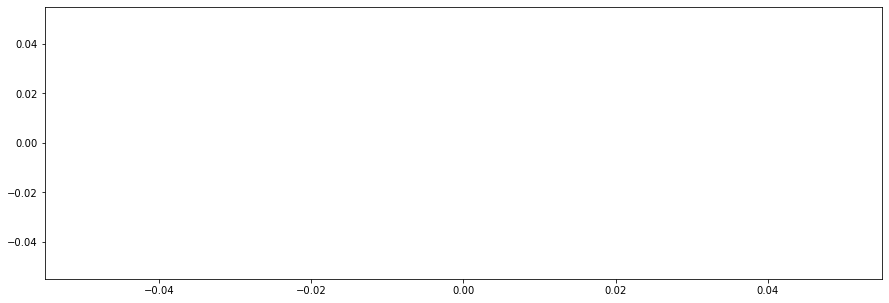

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
plt.plot()
plt.show()

<br> 삼성전자 종가 line를 추가했습니다. plt.title 를 이용해서 제목도 넣어줍니다. color='orangered' 인수를 넣어 line 색상도 빨간 오렌지 색으로 바꿔줍니다.

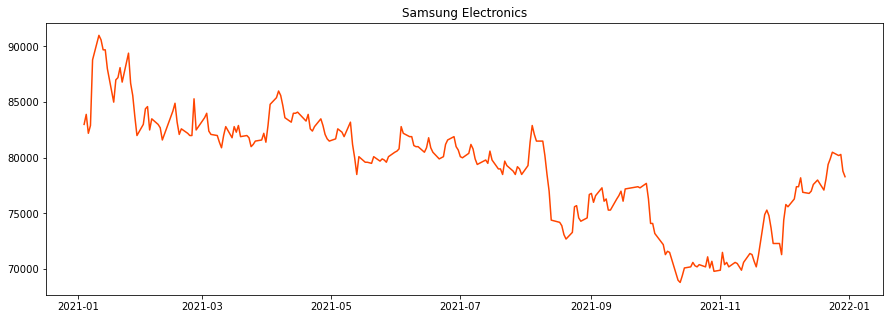

In [3]:
plt.figure(figsize=(15,5))
plt.title('Samsung Electronics')
plt.plot(stock_data['Close'], color='orangered')
plt.show()

<br> 이번에는 거래량 Bar Chart 를 추가합니다. 먼저 plt.subplots 에서 fig 와 ax 객체를 받아옵니다. fig 는 그래프의 사이즈 객체이고, ax 는 축 객체입니다. 주가와 거래량은 크기가 서로 틀리므로 두 개의 Y 축이 필요합니다. 원래의 축 ax 에 ax.twinx() 를 선언해서 새로운 축 ax2 을 만들어 줍니다. Bar Chart 는 ax2 축(오른쪽)에 그립니다.

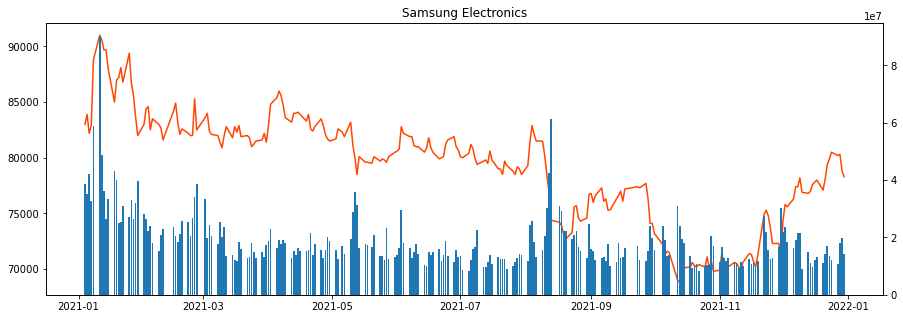

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Samsung Electronics')
ax.plot(stock_data['Close'], color='orangered')
ax2 = ax.twinx()
ax2.bar(height=stock_data['Volume'], x=stock_data.index)
plt.show()

<br> 만들어진 그래프에 set_ylabel 로 왼쪽, 오른쪽 Y 축에 레이블을 추가합니다. 그리고  각 축 ax, ax2 에 legend(위치) 를 표시하도록 합니다.

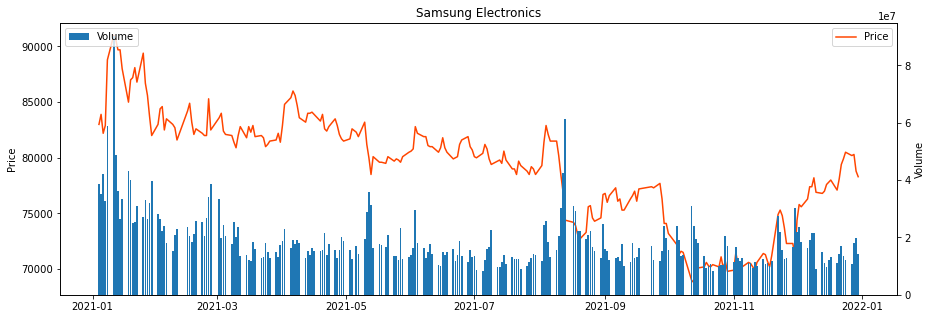

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Samsung Electronics')
ax.plot(stock_data['Close'], color='orangered', label='Price') # legend(범례)에 표시될 레이블 추가
ax2 = ax.twinx() # 새로운 축 만듦
ax2.bar(height=stock_data['Volume'], x=stock_data.index, label='Volume') # legend(범례)에 표시될 레이블 추가
ax.set_ylabel('Price')
ax2.set_ylabel('Volume')
ax.legend(loc=1) # 범례 표시 () 안은 위치
ax2.legend(loc=2) # 범례 표시 () 안은 위치 
plt.show()

<br> 이번에는 주가와 거래량 그래프를 나누어 그려보겠습니다. subplots 에서 그래프를 그릴 박스의 갯수를 정해주십니다. 아래는 한 라인에 두 개의 박스를 만들겠다는 의미입니다. 
```python   
plt.subplots(1,2, figsize=(15,5))
```

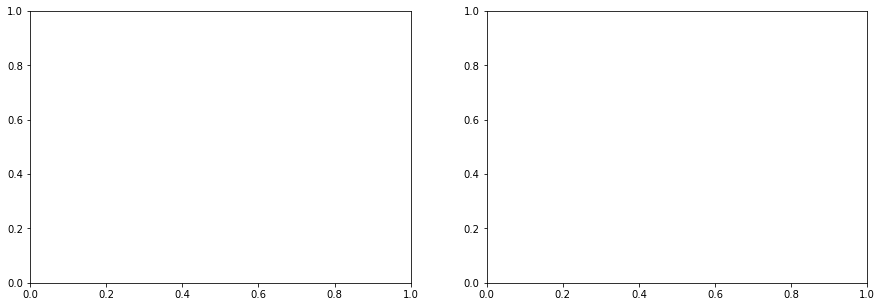

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

<br> 아래와 같이 2 개의 박스가 나왔습니다. 여기서 ax 는 2 개가 생성됩니다. 첫 번재 박스는 ax[0] 이고, 두 번째 박스는 ax[1] 이 됩니다. ax[0] 에 주가 그래프를 그리고 두 번째 박스 ax[1] 에 거래량 그래프를 그립니다. 

<BarContainer object of 248 artists>

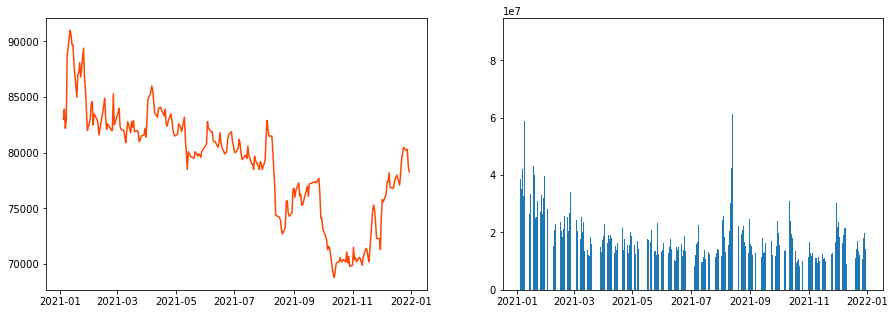

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(stock_data['Close'], color='orangered', label='Price')
ax[1].bar(height=stock_data['Volume'], x=stock_data.index, label='Volume')

<br> ax[0] 에 제목과 ylabel 를 넣어보겠습니다. 레전드도 추가합니다. 거래량 그래프도 동일하게 작업할 수 있습니다. 

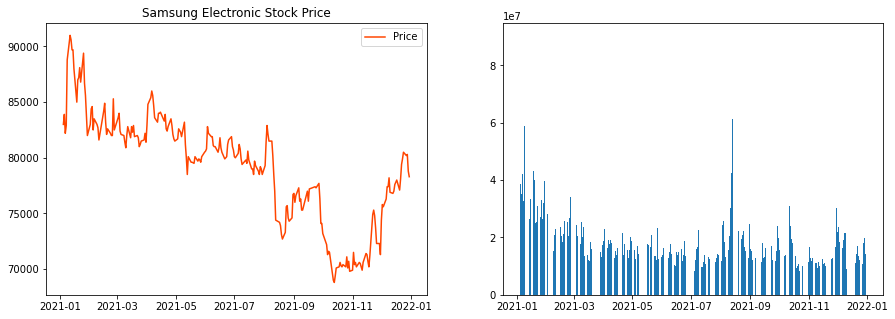

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(stock_data['Close'], color='orangered', label='Price')
ax[1].bar(height=stock_data['Volume'], x=stock_data.index, label='Volume')
ax[0].set_title('Samsung Electronic Stock Price')
ax[0].set_label('Stock Price')
ax[0].legend(loc='best')